<img src="https://certificate.tpq.io/taim_logo.png" width="350px" align="right">

# Artificial Intelligence in Finance

## Execution & Deployment

Dr Yves J Hilpisch | The AI Machine

http://aimachine.io | http://twitter.com/dyjh

In [1]:
import os
import time
import numpy as np
import pandas as pd
from pprint import pprint
from pylab import plt, mpl
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.float_format', '{:.5f}'.format)
np.set_printoptions(suppress=True, precision=4)
os.environ['PYTHONHASHSEED'] = '0'

In [2]:
import tpqoa

In [3]:
api = tpqoa.tpqoa('../aiif.cfg')

In [4]:
ins = api.get_instruments()

In [5]:
ins[:5]

[('AUD/CAD', 'AUD_CAD'),
 ('AUD/CHF', 'AUD_CHF'),
 ('AUD/HKD', 'AUD_HKD'),
 ('AUD/JPY', 'AUD_JPY'),
 ('AUD/NZD', 'AUD_NZD')]

In [6]:
raw = api.get_history(instrument='EUR_USD',
                      start='2018-01-01',
                      end='2020-07-31',
                      granularity='D',
                      price='A')

In [7]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 671 entries, 2018-01-01 22:00:00 to 2020-07-30 21:00:00
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   o         671 non-null    float64
 1   h         671 non-null    float64
 2   l         671 non-null    float64
 3   c         671 non-null    float64
 4   volume    671 non-null    int64  
 5   complete  671 non-null    bool   
dtypes: bool(1), float64(4), int64(1)
memory usage: 32.1 KB


In [8]:
raw.head()

,o,h,l,c,volume,complete
time,,,,,,
2018-01-01 22:00:00,1.20101,1.20819,1.20051,1.20610,35630,True
2018-01-02 22:00:00,1.20620,1.20673,1.20018,1.20170,31354,True
2018-01-03 22:00:00,1.20170,1.20897,1.20049,1.20710,35187,True
2018-01-04 22:00:00,1.20692,1.20847,1.20215,1.20327,36478,True
2018-01-07 22:00:00,1.20301,1.20530,1.19564,1.19717,27618,True


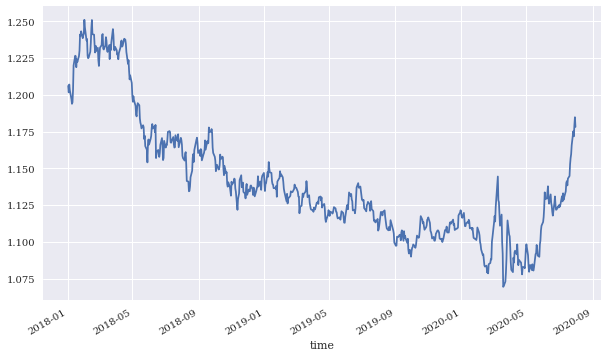

In [9]:
raw['c'].plot(figsize=(10, 6));
# plt.savefig('../../images/ch12/figure_ed_01.png');

In [10]:
raw = api.get_history(instrument='EUR_USD',
                      start='2020-07-01',
                      end='2020-07-31',
                      granularity='M1',
                      price='M') 

In [11]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30728 entries, 2020-07-01 00:00:00 to 2020-07-30 23:59:00
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   o         30728 non-null  float64
 1   h         30728 non-null  float64
 2   l         30728 non-null  float64
 3   c         30728 non-null  float64
 4   volume    30728 non-null  int64  
 5   complete  30728 non-null  bool   
dtypes: bool(1), float64(4), int64(1)
memory usage: 1.4 MB


In [12]:
raw.tail()

,o,h,l,c,volume,complete
time,,,,,,
2020-07-30 23:55:00,1.18724,1.18739,1.18718,1.18738,57,True
2020-07-30 23:56:00,1.18736,1.18758,1.18722,1.18757,57,True
2020-07-30 23:57:00,1.18756,1.18756,1.18734,1.18734,49,True
2020-07-30 23:58:00,1.18736,1.18737,1.18713,1.18717,36,True
2020-07-30 23:59:00,1.18718,1.18724,1.18714,1.18722,31,True


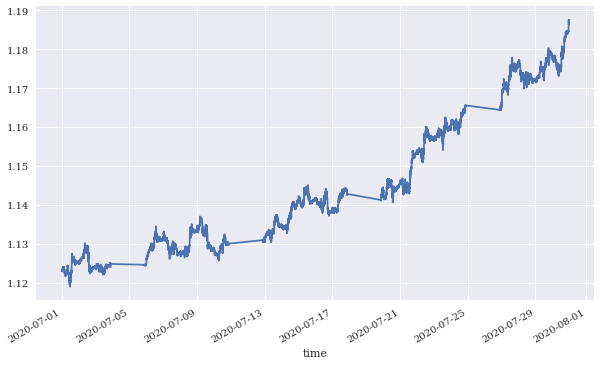

In [13]:
raw['c'].plot(figsize=(10, 6));
# plt.savefig('../../images/ch12/figure_ed_02.png');

In [14]:
api.stream_data('EUR_USD', stop=10)

2020-08-13T12:07:09.735715316Z 1.18328 1.18342
2020-08-13T12:07:16.245253689Z 1.18329 1.18343
2020-08-13T12:07:16.397803785Z 1.18328 1.18342
2020-08-13T12:07:17.240232521Z 1.18331 1.18346
2020-08-13T12:07:17.358476854Z 1.18334 1.18348
2020-08-13T12:07:17.778061207Z 1.18331 1.18345
2020-08-13T12:07:18.016544856Z 1.18333 1.18346
2020-08-13T12:07:18.144762415Z 1.18334 1.18348
2020-08-13T12:07:18.689365678Z 1.18331 1.18345
2020-08-13T12:07:19.148039139Z 1.18331 1.18345


In [15]:
order = api.create_order('EUR_USD', units=25000,
                         suppress=True, ret=True)
pprint(order)

{'accountBalance': '98553.3172',
 'accountID': '101-004-13834683-001',
 'batchID': '1625',
 'commission': '0.0',
 'financing': '0.0',
 'fullPrice': {'asks': [{'liquidity': '10000000', 'price': 1.18345}],
               'bids': [{'liquidity': '10000000', 'price': 1.18331}],
               'closeoutAsk': 1.18345,
               'closeoutBid': 1.18331,
               'type': 'PRICE'},
 'fullVWAP': 1.18345,
 'gainQuoteHomeConversionFactor': '0.840811914585',
 'guaranteedExecutionFee': '0.0',
 'halfSpreadCost': '1.4788',
 'id': '1626',
 'instrument': 'EUR_USD',
 'lossQuoteHomeConversionFactor': '0.849262285586',
 'orderID': '1625',
 'pl': '0.0',
 'price': 1.18345,
 'reason': 'MARKET_ORDER',
 'requestID': '78757241547812154',
 'time': '2020-08-13T12:07:19.434407966Z',
 'tradeOpened': {'guaranteedExecutionFee': '0.0',
                 'halfSpreadCost': '1.4788',
                 'initialMarginRequired': '832.5',
                 'price': 1.18345,
                 'tradeID': '1626',
          

In [16]:
def print_details(order):
    details = (order['time'][:-7], order['instrument'], order['units'],
               order['price'], order['pl'])
    return details

In [17]:
print_details(order)

('2020-08-13T12:07:19.434', 'EUR_USD', '25000.0', 1.18345, '0.0')

In [18]:
time.sleep(1)

In [19]:
order = api.create_order('EUR_USD', units=-25000,
                         suppress=True, ret=True)
pprint(order)

{'accountBalance': '98549.283',
 'accountID': '101-004-13834683-001',
 'batchID': '1627',
 'commission': '0.0',
 'financing': '0.0',
 'fullPrice': {'asks': [{'liquidity': '9975000', 'price': 1.18339}],
               'bids': [{'liquidity': '10000000', 'price': 1.18326}],
               'closeoutAsk': 1.18339,
               'closeoutBid': 1.18326,
               'type': 'PRICE'},
 'fullVWAP': 1.18326,
 'gainQuoteHomeConversionFactor': '0.840850994445',
 'guaranteedExecutionFee': '0.0',
 'halfSpreadCost': '1.3732',
 'id': '1628',
 'instrument': 'EUR_USD',
 'lossQuoteHomeConversionFactor': '0.849301758209',
 'orderID': '1627',
 'pl': '-4.0342',
 'price': 1.18326,
 'reason': 'MARKET_ORDER',
 'requestID': '78757241552009237',
 'time': '2020-08-13T12:07:20.586564454Z',
 'tradesClosed': [{'financing': '0.0',
                   'guaranteedExecutionFee': '0.0',
                   'halfSpreadCost': '1.3732',
                   'price': 1.18326,
                   'realizedPL': '-4.0342',
      

In [20]:
print_details(order) # <2>

('2020-08-13T12:07:20.586', 'EUR_USD', '-25000.0', 1.18326, '-4.0342')

In [21]:
time.sleep(1)

In [22]:
order = api.create_order('EUR_USD', units=25000,
                         sl_distance=0.005,
                         suppress=True, ret=True)

In [23]:
print_details(order)

('2020-08-13T12:07:21.740', 'EUR_USD', '25000.0', 1.18343, '0.0')

In [24]:
sl_order = api.get_transaction(tid=int(order['id']) + 1)

In [25]:
sl_order

{'id': '1631',
 'time': '2020-08-13T12:07:21.740825489Z',
 'userID': 13834683,
 'accountID': '101-004-13834683-001',
 'batchID': '1629',
 'requestID': '78757241556206373',
 'type': 'STOP_LOSS_ORDER',
 'tradeID': '1630',
 'price': 1.17843,
 'distance': '0.005',
 'timeInForce': 'GTC',
 'triggerCondition': 'DEFAULT',
 'reason': 'ON_FILL'}

In [26]:
(sl_order['time'], sl_order['type'], order['price'],
 sl_order['price'], sl_order['distance'])

('2020-08-13T12:07:21.740825489Z',
 'STOP_LOSS_ORDER',
 1.18343,
 1.17843,
 '0.005')

In [27]:
time.sleep(1)

In [28]:
order = api.create_order('EUR_USD', units=-25000, suppress=True, ret=True)

In [29]:
print_details(order)

('2020-08-13T12:07:23.059', 'EUR_USD', '-25000.0', 1.18329, '-2.9725')

In [30]:
order = api.create_order('EUR_USD', units=25000,
                         tsl_distance=0.005,
                         suppress=True, ret=True)

In [31]:
print_details(order)

('2020-08-13T12:07:23.204', 'EUR_USD', '25000.0', 1.18341, '0.0')

In [32]:
tsl_order = api.get_transaction(tid=int(order['id']) + 1)

In [33]:
tsl_order

{'id': '1637',
 'time': '2020-08-13T12:07:23.204457044Z',
 'userID': 13834683,
 'accountID': '101-004-13834683-001',
 'batchID': '1635',
 'requestID': '78757241564598562',
 'type': 'TRAILING_STOP_LOSS_ORDER',
 'tradeID': '1636',
 'distance': '0.005',
 'timeInForce': 'GTC',
 'triggerCondition': 'DEFAULT',
 'reason': 'ON_FILL'}

In [34]:
(tsl_order['time'][:-7], tsl_order['type'],
 order['price'], tsl_order['distance'])

('2020-08-13T12:07:23.204', 'TRAILING_STOP_LOSS_ORDER', 1.18341, '0.005')

In [35]:
time.sleep(1)

In [36]:
order = api.create_order('EUR_USD', units=-25000,
                         suppress=True, ret=True)

In [37]:
print_details(order)

('2020-08-13T12:07:24.551', 'EUR_USD', '-25000.0', 1.1833, '-2.3355')

In [38]:
time.sleep(1)

In [39]:
tp_price = round(order['price'] + 0.01, 4)
tp_price

1.1933

In [40]:
order = api.create_order('EUR_USD', units=25000,
                         tp_price=tp_price,
                         suppress=True, ret=True)

In [41]:
print_details(order)

('2020-08-13T12:07:25.712', 'EUR_USD', '25000.0', 1.18344, '0.0')

In [42]:
tp_order = api.get_transaction(tid=int(order['id']) + 1)

In [43]:
tp_order

{'id': '1643',
 'time': '2020-08-13T12:07:25.712531725Z',
 'userID': 13834683,
 'accountID': '101-004-13834683-001',
 'batchID': '1641',
 'requestID': '78757241572993078',
 'type': 'TAKE_PROFIT_ORDER',
 'tradeID': '1642',
 'price': 1.1933,
 'timeInForce': 'GTC',
 'triggerCondition': 'DEFAULT',
 'reason': 'ON_FILL'}

In [44]:
(tp_order['time'][:-7], tp_order['type'],
 order['price'], tp_order['price'])

('2020-08-13T12:07:25.712', 'TAKE_PROFIT_ORDER', 1.18344, 1.1933)

In [45]:
time.sleep(1)

In [46]:
order = api.create_order('EUR_USD', units=-25000,
                         suppress=True, ret=True)

In [47]:
print_details(order)

('2020-08-13T12:07:27.020', 'EUR_USD', '-25000.0', 1.18332, '-2.5478')

In [48]:
api.print_transactions(tid=int(order['id']) - 22)

 1624 | 2020-08-13T12:06:48.739290949Z |   EUR_USD |      25000.0 |  -1.4861
 1626 | 2020-08-13T12:07:19.434407966Z |   EUR_USD |      25000.0 |      0.0
 1628 | 2020-08-13T12:07:20.586564454Z |   EUR_USD |     -25000.0 |  -4.0342
 1630 | 2020-08-13T12:07:21.740825489Z |   EUR_USD |      25000.0 |      0.0
 1633 | 2020-08-13T12:07:23.059178023Z |   EUR_USD |     -25000.0 |  -2.9725
 1636 | 2020-08-13T12:07:23.204457044Z |   EUR_USD |      25000.0 |      0.0
 1639 | 2020-08-13T12:07:24.551026466Z |   EUR_USD |     -25000.0 |  -2.3355
 1642 | 2020-08-13T12:07:25.712531725Z |   EUR_USD |      25000.0 |      0.0
 1645 | 2020-08-13T12:07:27.020414342Z |   EUR_USD |     -25000.0 |  -2.5478


In [49]:
api.get_account_summary()

{'id': '101-004-13834683-001',
 'alias': 'Primary',
 'currency': 'EUR',
 'balance': '98541.4272',
 'createdByUserID': 13834683,
 'createdTime': '2020-03-19T06:08:14.363139403Z',
 'guaranteedStopLossOrderMode': 'DISABLED',
 'pl': '-1248.5543',
 'resettablePL': '-1248.5543',
 'resettablePLTime': '0',
 'financing': '-210.0185',
 'commission': '0.0',
 'guaranteedExecutionFees': '0.0',
 'marginRate': '0.0333',
 'openTradeCount': 1,
 'openPositionCount': 1,
 'pendingOrderCount': 0,
 'hedgingEnabled': False,
 'unrealizedPL': '941.9536',
 'NAV': '99483.3808',
 'marginUsed': '380.83',
 'marginAvailable': '99107.2283',
 'positionValue': '3808.3',
 'marginCloseoutUnrealizedPL': '947.9546',
 'marginCloseoutNAV': '99489.3818',
 'marginCloseoutMarginUsed': '380.83',
 'marginCloseoutPercent': '0.00191',
 'marginCloseoutPositionValue': '3808.3',
 'withdrawalLimit': '98541.4272',
 'marginCallMarginUsed': '380.83',
 'marginCallPercent': '0.00383',
 'lastTransactionID': '1646'}

In [50]:
import oandaenv as oe

In [51]:
symbol = 'EUR_USD'

In [52]:
date = '2020-08-11'

In [53]:
features = [symbol, 'r', 's', 'm', 'v']

In [54]:
%%time
learn_env = oe.OandaEnv(symbol=symbol,
                  start=f'{date} 08:00:00',
                  end=f'{date} 13:00:00',
                  granularity='S30',
                  price='M',
                  features=features,
                  window=20,
                  lags=3,
                  leverage=20,
                  min_accuracy=0.4,
                  min_performance=0.85
                 )

CPU times: user 23.1 ms, sys: 2.86 ms, total: 25.9 ms
Wall time: 26.8 ms


In [55]:
np.bincount(learn_env.data['d'])

array([299, 281])

In [56]:
learn_env.data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 580 entries, 2020-08-11 08:10:00 to 2020-08-11 12:59:30
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   EUR_USD  580 non-null    float64
 1   r        580 non-null    float64
 2   s        580 non-null    float64
 3   m        580 non-null    float64
 4   v        580 non-null    float64
 5   d        580 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 31.7 KB


In [57]:
valid_env = oe.OandaEnv(symbol=learn_env.symbol,
                  start=f'{date} 13:00:00',
                  end=f'{date} 14:00:00',
                  granularity=learn_env.granularity,
                  price=learn_env.price,
                  features=learn_env.features,
                  window=learn_env.window,
                  lags=learn_env.lags,
                  leverage=learn_env.leverage,
                  min_accuracy=0,
                  min_performance=0,
                  mu=learn_env.mu,
                  std=learn_env.std
                 )

In [58]:
valid_env.data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2020-08-11 13:10:00 to 2020-08-11 13:59:30
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   EUR_USD  100 non-null    float64
 1   r        100 non-null    float64
 2   s        100 non-null    float64
 3   m        100 non-null    float64
 4   v        100 non-null    float64
 5   d        100 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 5.5 KB


In [59]:
test_env = oe.OandaEnv(symbol=learn_env.symbol,
                  start=f'{date} 14:00:00',
                  end=f'{date} 17:00:00',
                  granularity=learn_env.granularity,
                  price=learn_env.price,
                  features=learn_env.features,
                  window=learn_env.window,
                  lags=learn_env.lags,
                  leverage=learn_env.leverage,
                  min_accuracy=0,
                  min_performance=0,
                  mu=learn_env.mu,
                  std=learn_env.std
                 )

In [60]:
test_env.data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 340 entries, 2020-08-11 14:10:00 to 2020-08-11 16:59:30
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   EUR_USD  340 non-null    float64
 1   r        340 non-null    float64
 2   s        340 non-null    float64
 3   m        340 non-null    float64
 4   v        340 non-null    float64
 5   d        340 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 18.6 KB


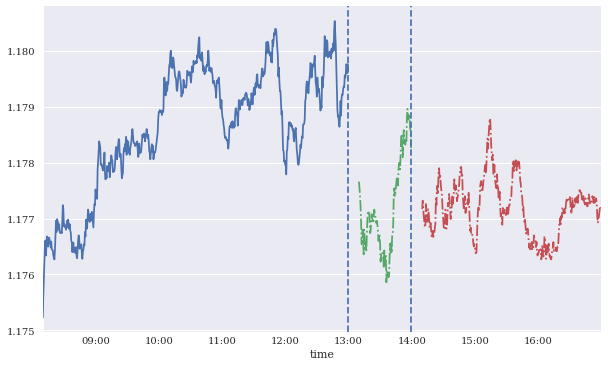

In [61]:
ax = learn_env.data[learn_env.symbol].plot(figsize=(10, 6))
plt.axvline(learn_env.data.index[-1], ls='--')
valid_env.data[learn_env.symbol].plot(ax=ax, style='-.')
plt.axvline(valid_env.data.index[-1], ls='--')
test_env.data[learn_env.symbol].plot(ax=ax, style='-.');
# plt.savefig('../../images/ch12/figure_ed_03.png');

In [62]:
import sys
sys.path.append('../ch11/')

In [63]:
import tradingbot

Using TensorFlow backend.


In [64]:
tradingbot.set_seeds(100)
agent = tradingbot.TradingBot(24, 0.001, learn_env=learn_env,
                              valid_env=valid_env)

In [65]:
episodes = 31

In [66]:
%time agent.learn(episodes)

episode:  5/31 | VALIDATION | treward:   97 | perf: 1.004 | eps: 0.96
episode: 10/31 | VALIDATION | treward:   97 | perf: 1.005 | eps: 0.91
episode: 15/31 | VALIDATION | treward:   97 | perf: 0.986 | eps: 0.87
episode: 20/31 | VALIDATION | treward:   97 | perf: 1.012 | eps: 0.83
episode: 25/31 | VALIDATION | treward:   97 | perf: 0.995 | eps: 0.79
episode: 30/31 | VALIDATION | treward:   97 | perf: 0.972 | eps: 0.75
episode: 31/31 | treward:   16 | perf: 0.981 | av: 376.0 | max:  577
CPU times: user 22.1 s, sys: 1.17 s, total: 23.3 s
Wall time: 20.1 s


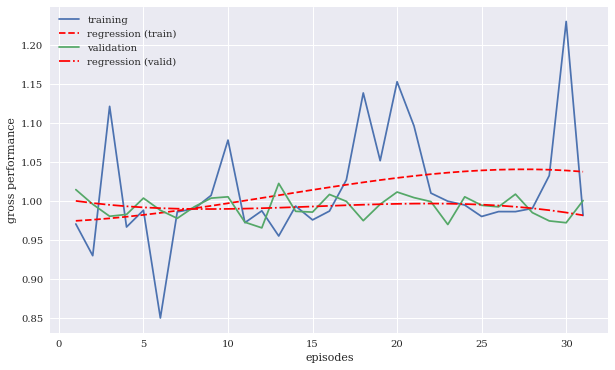

In [67]:
tradingbot.plot_performance(agent)
# plt.savefig('../../images/ch12/figure_ed_04.png');

In [68]:
import backtest as bt

In [69]:
env = test_env

In [70]:
bt.backtest(agent, env)

In [71]:
env.data['p'].iloc[env.lags:].value_counts()

 1    263
-1     74
Name: p, dtype: int64

In [72]:
sum(env.data['p'].iloc[env.lags:].diff() != 0)

25

In [73]:
(env.data[['r', 's']].iloc[env.lags:] * env.leverage).sum(
        ).apply(np.exp)

r   0.99966
s   1.05910
dtype: float64

In [74]:
(env.data[['r', 's']].iloc[env.lags:] * env.leverage).sum(
        ).apply(np.exp) - 1

r   -0.00034
s    0.05910
dtype: float64

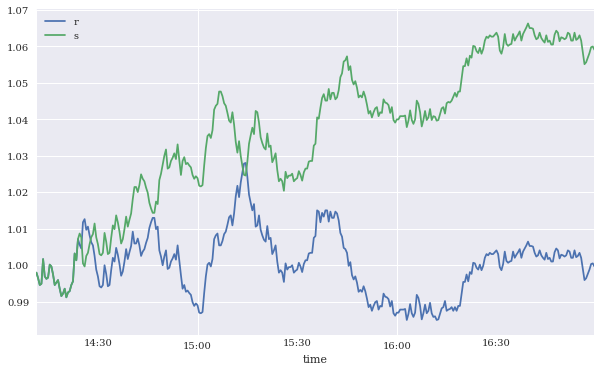

In [75]:
(env.data[['r', 's']].iloc[env.lags:] * env.leverage).cumsum(
        ).apply(np.exp).plot(figsize=(10, 6));
# plt.savefig('../../images/ch12/figure_ed_05.png');

In [76]:
import tpqoa

In [77]:
class OandaTradingBot(tpqoa.tpqoa):
    def __init__(self, config_file, agent, granularity, units,
                 verbose=True):
        super(OandaTradingBot, self).__init__(config_file)
        self.agent = agent
        self.symbol = self.agent.learn_env.symbol
        self.env = agent.learn_env
        self.window = self.env.window
        if granularity is None:
            self.granularity = agent.learn_env.granularity
        else:
            self.granularity = granularity
        self.units = units
        self.trades = 0
        self.position = 0
        self.tick_data = pd.DataFrame()
        self.min_length = (self.agent.learn_env.window +
                           self.agent.learn_env.lags)
        self.pl = list()
        self.verbose = verbose
    def _prepare_data(self):
        self.data['r'] = np.log(self.data / self.data.shift(1))
        self.data.dropna(inplace=True)
        self.data['s'] = self.data[self.symbol].rolling(
                                            self.window).mean()
        self.data['m'] = self.data['r'].rolling(self.window).mean()
        self.data['v'] = self.data['r'].rolling(self.window).std()
        self.data.dropna(inplace=True)
        # self.data_ = (self.data - self.env.mu) / self.env.std
        self.data_ = (self.data - self.data.mean()) / self.data.std()
    def _resample_data(self):
        self.data = self.tick_data.resample(self.granularity,
                        label='right').last().ffill().iloc[:-1]
        self.data = pd.DataFrame(self.data['mid'])
        self.data.columns = [self.symbol,]
        self.data.index = self.data.index.tz_localize(None)
    def _get_state(self):
        state = self.data_[self.env.features].iloc[-self.env.lags:]
        return np.reshape(state.values, [1, self.env.lags,
                                         self.env.n_features])
    def report_trade(self, time, side, order):
        self.trades += 1
        pl = float(order['pl'])
        self.pl.append(pl)
        cpl = sum(self.pl)
        print('\n' + 75 * '=')
        print(f'{time} | *** GOING {side} ({self.trades}) ***')
        print(f'{time} | PROFIT/LOSS={pl:.2f} | CUMULATIVE={cpl:.2f}')
        print(75 * '=')
        if self.verbose:
            pprint(order)
            print(75 * '=')
    def on_success(self, time, bid, ask):
        df = pd.DataFrame({'ask': ask, 'bid': bid,
                           'mid': (bid + ask) / 2},
                          index=[pd.Timestamp(time)])
        self.tick_data = self.tick_data.append(df)
        self._resample_data()
        if len(self.data) > self.min_length:
            self.min_length += 1
            self._prepare_data()
            state = self._get_state()
            prediction = np.argmax(
                self.agent.model.predict(state)[0, 0])
            position = 1 if prediction == 1 else -1
            if self.position in [0, -1] and position == 1:
                order = self.create_order(self.symbol,
                        units=(1 - self.position) * self.units,
                                suppress=True, ret=True)
                self.report_trade(time, 'LONG', order)
                self.position = 1
            elif self.position in [0, 1] and position == -1:
                order = self.create_order(self.symbol,
                        units=-(1 + self.position) * self.units,
                                suppress=True, ret=True)
                self.report_trade(time, 'SHORT', order)
                self.position = -1

In [78]:
otb = OandaTradingBot('../aiif.cfg', agent, '30s',
                      25000, verbose=False)

In [79]:
otb.tick_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Empty DataFrame

In [80]:
otb.stream_data(agent.learn_env.symbol, stop=1000)


2020-08-13T12:19:32.320291893Z | *** GOING SHORT (1) ***
2020-08-13T12:19:32.320291893Z | PROFIT/LOSS=0.00 | CUMULATIVE=0.00

2020-08-13T12:20:00.083985447Z | *** GOING LONG (2) ***
2020-08-13T12:20:00.083985447Z | PROFIT/LOSS=-6.80 | CUMULATIVE=-6.80

2020-08-13T12:25:00.099901587Z | *** GOING SHORT (3) ***
2020-08-13T12:25:00.099901587Z | PROFIT/LOSS=-7.86 | CUMULATIVE=-14.66


In [81]:
print('\n' + 75 * '=')
print('*** CLOSING OUT ***')
order = otb.create_order(otb.symbol,
                units=-otb.position * otb.units,
                suppress=True, ret=True)
otb.report_trade(otb.time, 'NEUTRAL', order)
if otb.verbose:
    pprint(order)
print(75 * '=')


*** CLOSING OUT ***

2020-08-13T12:25:16.870357562Z | *** GOING NEUTRAL (4) ***
2020-08-13T12:25:16.870357562Z | PROFIT/LOSS=-3.19 | CUMULATIVE=-17.84


In [82]:
pl = np.array(otb.pl)

In [83]:
pl

array([ 0.    , -6.7959, -7.8594, -3.1862])

In [84]:
pl.cumsum()

array([  0.    ,  -6.7959, -14.6553, -17.8415])

In [85]:
import pickle

In [86]:
pickle.dump(agent, open('trading.bot', 'wb'))

<img src='http://hilpisch.com/taim_logo.png' width="350px" align="right">

<br><br><br><a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:ai@tpq.io">ai@tpq.io</a>